In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\NASA\\adilabad_nasa.csv") # Reading the data

In [3]:
df

,temp_max,temp_min,rainfall,pressure,Date,Unnamed: 5
0,28.33,11.51,0.00,97.29,1/1/1991,NaN
1,27.56,7.54,0.00,97.29,1/2/1991,NaN
2,24.52,7.00,0.00,97.51,1/3/1991,NaN
3,26.04,6.37,0.00,97.64,1/4/1991,NaN
4,28.26,7.56,0.00,97.58,1/5/1991,NaN
...,...,...,...,...,...,...
11683,29.36,18.57,1.82,97.66,12/27/2022,NaN
11684,29.12,18.52,0.40,97.75,12/28/2022,NaN
11685,28.05,13.55,0.00,97.90,12/29/2022,NaN
11686,29.26,16.68,0.00,97.92,12/30/2022,NaN


In [4]:
df.drop(['Unnamed: 5'] , axis=1, inplace=True) # Droppping unnecessary/accidental columns

In [5]:
df.describe()

,temp_max,temp_min,rainfall,pressure
count,11688.000000,11688.000000,11688.000000,11688.000000
mean,33.449159,21.058159,2.771356,97.021030
std,5.478335,5.284212,7.280311,0.487849
min,19.450000,6.120000,0.000000,95.590000
25%,29.330000,16.980000,0.000000,96.610000
50%,31.515000,22.400000,0.010000,97.010000
75%,37.600000,24.230000,1.840000,97.450000
max,48.010000,33.460000,145.800000,98.180000


In [6]:
df['Date']= pd.to_datetime(df.Date, format="%m/%d/%Y")
df= df.set_index('Date') # Setting the column 'date'  as index for our dataframe

In [7]:
print(pd.infer_freq(df.index))

D


In [8]:
df=df.drop(['temp_min', 'pressure'], axis=1)

In [9]:
df.describe()

,temp_max,rainfall
count,11688.000000,11688.000000
mean,33.449159,2.771356
std,5.478335,7.280311
min,19.450000,0.000000
25%,29.330000,0.000000
50%,31.515000,0.010000
75%,37.600000,1.840000
max,48.010000,145.800000


In [10]:
df['rainfall']=df['rainfall']/150
df['temp_max']=df['temp_max']/50


In [13]:
df1=df[:10958]
df1

,temp_max,rainfall
Date,,
1991-01-01,0.5666,0.0
1991-01-02,0.5512,0.0
1991-01-03,0.4904,0.0
1991-01-04,0.5208,0.0
1991-01-05,0.5652,0.0
...,...,...
2020-12-27,0.5884,0.0
2020-12-28,0.5952,0.0
2020-12-29,0.5860,0.0


In [79]:
df1.describe()


,temp_max,rainfall,pressure
count,10958.00000,10958.000000,10958.000000
mean,0.67071,0.017426,0.970219
std,0.10902,0.044666,0.004891
min,0.38900,0.000000,0.955900
25%,0.58845,0.000000,0.966000
50%,0.63230,0.000067,0.970200
75%,0.75280,0.011667,0.974500
max,0.96020,0.972000,0.981800


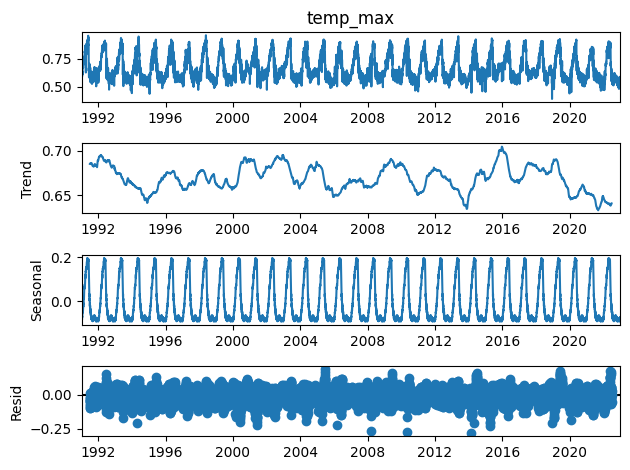

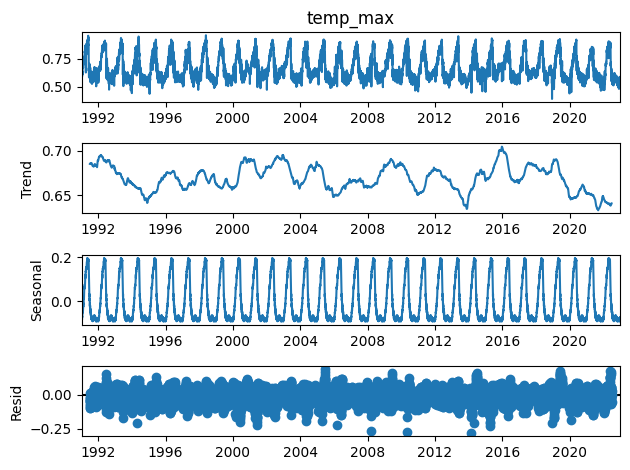

In [75]:
decompose_result = seasonal_decompose(df['temp_max'], period=365 ,model='add')
decompose_result.plot() 

In [140]:
df3=df['temp_max']

In [143]:
df3=df3.asfreq(freq='D')

In [149]:
train=df3[:11323]
# train=train/50
test=df3[11323:]
# test=test/50

In [168]:
# Running Holt-Winters Exponential Smoothing on the train data for Adilabad
fit3 = ExponentialSmoothing(
    train,
    seasonal_periods=365,
    trend="add",
    seasonal="add", 
    initialization_method="estimated",
    
).fit(optimized=True)

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
prediction= fit3.forecast(365)
prediction=prediction*50

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [153]:
test=test*50

In [119]:
prediction=prediction*50 # Multiplying by 50 since we normalized by 50 

In [154]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae # importing the error metric libraries

In [159]:
for i in range(len(test)):
    print("Prediction {} :{}   Expected:{}".format(int(i/30), prediction[i], test[i]))

Prediction 0 :25.301873843871235   Expected:26.74
Prediction 0 :25.62597509793203   Expected:27.12
Prediction 0 :25.46017380833623   Expected:26.85
Prediction 0 :25.40469520336036   Expected:27.500000000000004
Prediction 0 :25.74860206057109   Expected:28.57
Prediction 0 :26.065322098706822   Expected:28.809999999999995
Prediction 0 :26.080176748641065   Expected:29.049999999999997
Prediction 0 :26.19808856801295   Expected:26.150000000000002
Prediction 0 :25.979278835778448   Expected:27.88
Prediction 0 :26.256469799625325   Expected:27.24
Prediction 0 :26.65768542569736   Expected:25.239999999999995
Prediction 0 :26.772259901665635   Expected:24.04
Prediction 0 :26.766527617769203   Expected:25.759999999999998
Prediction 0 :26.947248249841504   Expected:26.0
Prediction 0 :27.194688205182498   Expected:25.36
Prediction 0 :27.27956394195964   Expected:26.21
Prediction 0 :27.223741459834205   Expected:26.57
Prediction 0 :27.182321309235036   Expected:25.97
Prediction 0 :27.3339491900063

In [170]:
rmse= mse(test, prediction, squared=False)
print(rmse) # printing the root mean squared error
mae1= mae(test, prediction)
print(mae1) # Printing the mean absolute error

3.542155195859279
2.947040487614295


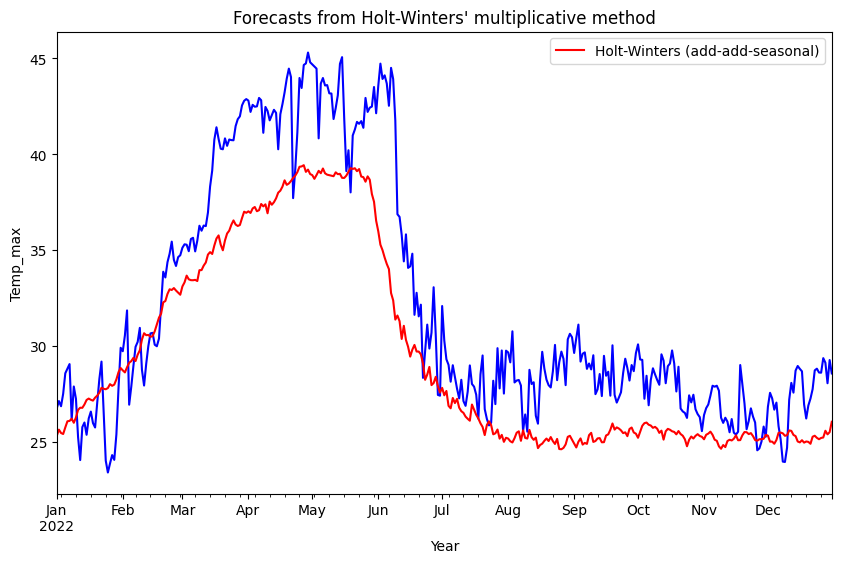

In [169]:
# Comparison of predictions in the form of graph
ax = test.plot(
    figsize=(10, 6),
    color="blue",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

prediction.rename("Holt-Winters (add-add-seasonal)").plot(ax=ax, color="red", legend=True)     

plt.show() 

In [85]:
df1

,temp_max,rainfall,pressure
Date,,,
1991-01-01,0.5666,0.0,0.9729
1991-01-02,0.5512,0.0,0.9729
1991-01-03,0.4904,0.0,0.9751
1991-01-04,0.5208,0.0,0.9764
1991-01-05,0.5652,0.0,0.9758
...,...,...,...
2020-12-27,0.5884,0.0,0.9753
2020-12-28,0.5952,0.0,0.9745
2020-12-29,0.5860,0.0,0.9747


In [15]:
#  Data preparation for LSTM
def create_data(df, lookback=365):
    df_np= df.to_numpy()
    X=[]
    y=[]
    
    for i in range(len(df_np)-2*lookback):
        row = [x for x in df_np[i:i+lookback]]
        X.append(row)
        label = [z[0] for z in df_np[i+lookback:i+(2*lookback)]] # It will map the temperature and rainfall of [i]th day to i+365th day temperature
        y.append(label)
    return np.array(X), np.array(y)
    

In [16]:
X,y = create_data(df1)

In [17]:
X.shape, y.shape

((10228, 365, 2), (10228, 365))

In [18]:
X_train, y_train, X_test, y_test = X[:9265], y[:9265], X[9265:], y[9265:]
X_train, y_train, X_val, y_val= X_train[:8242], y_train[:8242], X_train[8242:9265], y_train[8242:9265]

In [19]:
len(X_train), len(X_val), len(X_test)

(8242, 1023, 963)

In [20]:
X_train.shape, y_train.shape

((8242, 365, 2), (8242, 365))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


In [24]:

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam


In [25]:
# LSTM
adilabad_temp= Sequential([
    InputLayer((365,2)),
    LSTM(units=128),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(365, activation='relu'),  
])

adilabad_temp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dense_3 (Dense)             (None, 365)               187245    
                                                                 
Total params: 320,365
Trainable params: 320,365
Non-trainable params: 0
_________________________________________________________________


In [26]:
adilabad_cp= ModelCheckpoint('adilabad_temp/', save_best_only=True)
adilabad_temp.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=[MeanAbsolutePercentageError()]
)
epochs=200
history=adilabad_temp.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[adilabad_cp])

Epoch 1/200
257/258 [============================>.] - ETA: 0s - loss: 0.0634 - mean_absolute_percentage_error: 24.3541

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 28s 81ms/step - loss: 0.0634 - mean_absolute_percentage_error: 24.3438 - val_loss: 0.0464 - val_mean_absolute_percentage_error: 17.7052
Epoch 2/200
257/258 [============================>.] - ETA: 0s - loss: 0.0428 - mean_absolute_percentage_error: 17.8373

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 77ms/step - loss: 0.0428 - mean_absolute_percentage_error: 17.8315 - val_loss: 0.0388 - val_mean_absolute_percentage_error: 15.0105
Epoch 3/200
258/258 [==============================] - ETA: 0s - loss: 0.0305 - mean_absolute_percentage_error: 12.6328

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 75ms/step - loss: 0.0305 - mean_absolute_percentage_error: 12.6328 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 11.7581
Epoch 4/200
258/258 [==============================] - ETA: 0s - loss: 0.0216 - mean_absolute_percentage_error: 10.2637

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 77ms/step - loss: 0.0216 - mean_absolute_percentage_error: 10.2637 - val_loss: 0.0164 - val_mean_absolute_percentage_error: 9.4123
Epoch 5/200
258/258 [==============================] - ETA: 0s - loss: 0.0152 - mean_absolute_percentage_error: 8.5880

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 19s 75ms/step - loss: 0.0152 - mean_absolute_percentage_error: 8.5880 - val_loss: 0.0162 - val_mean_absolute_percentage_error: 9.3535
Epoch 6/200
257/258 [============================>.] - ETA: 0s - loss: 0.0151 - mean_absolute_percentage_error: 8.4832

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 79ms/step - loss: 0.0151 - mean_absolute_percentage_error: 8.4827 - val_loss: 0.0159 - val_mean_absolute_percentage_error: 9.0561
Epoch 7/200
257/258 [============================>.] - ETA: 0s - loss: 0.0134 - mean_absolute_percentage_error: 8.0006

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 19s 75ms/step - loss: 0.0134 - mean_absolute_percentage_error: 7.9994 - val_loss: 0.0133 - val_mean_absolute_percentage_error: 8.4285
Epoch 8/200
257/258 [============================>.] - ETA: 0s - loss: 0.0124 - mean_absolute_percentage_error: 7.7909

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 22s 85ms/step - loss: 0.0124 - mean_absolute_percentage_error: 7.7913 - val_loss: 0.0132 - val_mean_absolute_percentage_error: 8.3851
Epoch 9/200
257/258 [============================>.] - ETA: 0s - loss: 0.0124 - mean_absolute_percentage_error: 7.7264

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 77ms/step - loss: 0.0124 - mean_absolute_percentage_error: 7.7258 - val_loss: 0.0132 - val_mean_absolute_percentage_error: 8.3051
Epoch 10/200
258/258 [==============================] - 14s 55ms/step - loss: 0.0123 - mean_absolute_percentage_error: 7.6871 - val_loss: 0.0134 - val_mean_absolute_percentage_error: 8.5499
Epoch 11/200
257/258 [============================>.] - ETA: 0s - loss: 0.0123 - mean_absolute_percentage_error: 7.6307

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 78ms/step - loss: 0.0123 - mean_absolute_percentage_error: 7.6313 - val_loss: 0.0130 - val_mean_absolute_percentage_error: 8.0993
Epoch 12/200
257/258 [============================>.] - ETA: 0s - loss: 0.0123 - mean_absolute_percentage_error: 7.6630

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 76ms/step - loss: 0.0123 - mean_absolute_percentage_error: 7.6622 - val_loss: 0.0129 - val_mean_absolute_percentage_error: 7.9516
Epoch 13/200
257/258 [============================>.] - ETA: 0s - loss: 0.0123 - mean_absolute_percentage_error: 7.6387

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 19s 75ms/step - loss: 0.0123 - mean_absolute_percentage_error: 7.6389 - val_loss: 0.0129 - val_mean_absolute_percentage_error: 7.9237
Epoch 14/200
257/258 [============================>.] - ETA: 0s - loss: 0.0107 - mean_absolute_percentage_error: 7.2935

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 26s 101ms/step - loss: 0.0107 - mean_absolute_percentage_error: 7.2931 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 7.4198
Epoch 15/200
258/258 [==============================] - ETA: 0s - loss: 0.0086 - mean_absolute_percentage_error: 6.8185

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 21s 81ms/step - loss: 0.0086 - mean_absolute_percentage_error: 6.8185 - val_loss: 0.0098 - val_mean_absolute_percentage_error: 7.8762
Epoch 16/200
257/258 [============================>.] - ETA: 0s - loss: 0.0085 - mean_absolute_percentage_error: 6.8150

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 79ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.8157 - val_loss: 0.0090 - val_mean_absolute_percentage_error: 7.1242
Epoch 17/200
257/258 [============================>.] - ETA: 0s - loss: 0.0085 - mean_absolute_percentage_error: 6.8032

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 20s 76ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.8031 - val_loss: 0.0089 - val_mean_absolute_percentage_error: 7.0519
Epoch 18/200
258/258 [==============================] - 14s 54ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.7989 - val_loss: 0.0091 - val_mean_absolute_percentage_error: 7.2431
Epoch 19/200
258/258 [==============================] - 16s 63ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.7837 - val_loss: 0.0090 - val_mean_absolute_percentage_error: 7.1947
Epoch 20/200
258/258 [==============================] - 22s 87ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.7826 - val_loss: 0.0093 - val_mean_absolute_percentage_error: 7.4673
Epoch 21/200
258/258 [==============================] - 7s 29ms/step - loss: 0.0085 - mean_absolute_percentage_error: 6.7734 - val_loss: 0.0091 - val_mean_absolute_percentage_error: 7.2456
Epoch 22/200
257/258 [============================>.] - ETA: 0s 

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 13s 50ms/step - loss: 0.0083 - mean_absolute_percentage_error: 6.6967 - val_loss: 0.0077 - val_mean_absolute_percentage_error: 6.8419
Epoch 23/200
258/258 [==============================] - 8s 32ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4337 - val_loss: 0.0078 - val_mean_absolute_percentage_error: 7.0822
Epoch 24/200
258/258 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_percentage_error: 6.4509

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 12s 47ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4509 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 6.6264
Epoch 25/200
257/258 [============================>.] - ETA: 0s - loss: 0.0072 - mean_absolute_percentage_error: 6.4051

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 13s 49ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4050 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 6.5443
Epoch 26/200
258/258 [==============================] - 6s 21ms/step - loss: 0.0071 - mean_absolute_percentage_error: 6.3747 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 6.5702
Epoch 27/200
258/258 [==============================] - 8s 30ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4389 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 6.7260
Epoch 28/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4364 - val_loss: 0.0076 - val_mean_absolute_percentage_error: 6.7782
Epoch 29/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0072 - mean_absolute_percentage_error: 6.4098 - val_loss: 0.0076 - val_mean_absolute_percentage_error: 6.7563
Epoch 30/200
258/258 [==============================] - 7s 28ms/ste

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 37ms/step - loss: 0.0071 - mean_absolute_percentage_error: 6.3252 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 6.5329
Epoch 36/200
256/258 [============================>.] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 6.2907

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 38ms/step - loss: 0.0069 - mean_absolute_percentage_error: 6.2900 - val_loss: 0.0062 - val_mean_absolute_percentage_error: 6.3362
Epoch 37/200
257/258 [============================>.] - ETA: 0s - loss: 0.0056 - mean_absolute_percentage_error: 6.0651

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 38ms/step - loss: 0.0056 - mean_absolute_percentage_error: 6.0643 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6.0066
Epoch 38/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.8248 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 6.0891
Epoch 39/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.7841 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 6.2255
Epoch 40/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.7736 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 6.9936
Epoch 41/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0046 - mean_absolute_percentage_error: 5.7529 - val_loss: 0.0049 - val_mean_absolute_percentage_error: 6.1943
Epoch 42/200
258/258 [==============================] - 7s 28ms/ste

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 39ms/step - loss: 0.0035 - mean_absolute_percentage_error: 5.4128 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.0298
Epoch 55/200
256/258 [============================>.] - ETA: 0s - loss: 0.0031 - mean_absolute_percentage_error: 5.3124

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 38ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.3113 - val_loss: 0.0035 - val_mean_absolute_percentage_error: 5.7187
Epoch 56/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2998 - val_loss: 0.0036 - val_mean_absolute_percentage_error: 5.7906
Epoch 57/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2742 - val_loss: 0.0035 - val_mean_absolute_percentage_error: 5.7739
Epoch 58/200
256/258 [============================>.] - ETA: 0s - loss: 0.0031 - mean_absolute_percentage_error: 5.2768

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 39ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2764 - val_loss: 0.0035 - val_mean_absolute_percentage_error: 5.7064
Epoch 59/200
258/258 [==============================] - 8s 30ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2617 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 6.1175
Epoch 60/200
258/258 [==============================] - 7s 29ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2287 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 5.9825
Epoch 61/200
257/258 [============================>.] - ETA: 0s - loss: 0.0031 - mean_absolute_percentage_error: 5.2374

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 38ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.2367 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 5.5892
Epoch 62/200
257/258 [============================>.] - ETA: 0s - loss: 0.0020 - mean_absolute_percentage_error: 5.0339

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 40ms/step - loss: 0.0020 - mean_absolute_percentage_error: 5.0341 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 5.6618
Epoch 63/200
258/258 [==============================] - 8s 29ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.9546 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.9007
Epoch 64/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.9265 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 5.7238
Epoch 65/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.9415 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 5.6878
Epoch 66/200
258/258 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_percentage_error: 4.8962

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 9s 37ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.8962 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 5.5568
Epoch 67/200
258/258 [==============================] - ETA: 0s - loss: 0.0018 - mean_absolute_percentage_error: 4.8989

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 39ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.8989 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.4917
Epoch 68/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.8699 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 5.7066
Epoch 69/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.8351 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.9490
Epoch 70/200
257/258 [============================>.] - ETA: 0s - loss: 0.0017 - mean_absolute_percentage_error: 4.8340

INFO:tensorflow:Assets written to: adilabad_temp\assets


INFO:tensorflow:Assets written to: adilabad_temp\assets


258/258 [==============================] - 10s 39ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.8344 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.3737
Epoch 71/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.8095 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 5.6763
Epoch 72/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.7657 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 5.5608
Epoch 73/200
258/258 [==============================] - 7s 29ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.7719 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 5.5879
Epoch 74/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.6977 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.8246
Epoch 75/200
258/258 [==============================] - 7s 28ms/ste

258/258 [==============================] - 7s 28ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.9183 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 6.2115
Epoch 157/200
258/258 [==============================] - 7s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.9311 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 6.2133
Epoch 158/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.9025 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 6.2219
Epoch 159/200
258/258 [==============================] - 7s 29ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.8938 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 6.0943
Epoch 160/200
258/258 [==============================] - 7s 28ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.8917 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 6.0162
Epoch 161/200
258/258 [==============================] - 7s 29ms

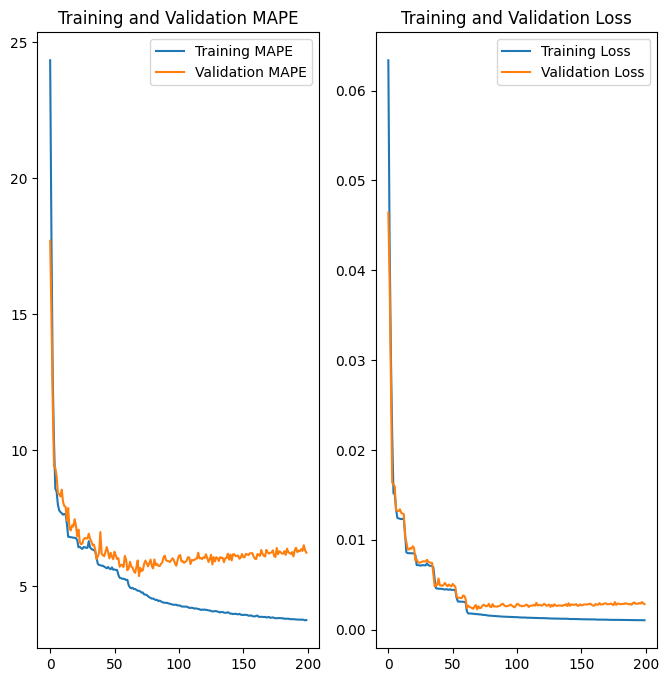

In [27]:
acc = history.history['mean_absolute_percentage_error']
val_acc = history.history['val_mean_absolute_percentage_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAPE')
plt.plot(epochs_range, val_acc, label='Validation MAPE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAPE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
res=adilabad_temp.evaluate(X_test,y_test)

31/31 [==============================] - 0s 12ms/step - loss: 0.0031 - mean_absolute_percentage_error: 6.3148


In [31]:
from tensorflow import keras

In [32]:
adilabad_temp.save("adilabad_heat_nasa.h5", save_format='h5') # Saving the model in h5 format to call it in the front-end

In [30]:
test_x=df[10958:11323]
display(test_x)
test_x=test_x.to_numpy()
test_x=test_x.reshape(1,365,2)
test_x

,temp_max,rainfall
Date,,
2021-01-01,0.5572,0.000133
2021-01-02,0.5674,0.000000
2021-01-03,0.5748,0.000000
2021-01-04,0.5756,0.000000
2021-01-05,0.5902,0.000133
...,...,...
2021-12-27,0.5496,0.000000
2021-12-28,0.5502,0.012733
2021-12-29,0.5042,0.016600


array([[[5.57200000e-01, 1.33333333e-04],
        [5.67400000e-01, 0.00000000e+00],
        [5.74800000e-01, 0.00000000e+00],
        [5.75600000e-01, 0.00000000e+00],
        [5.90200000e-01, 1.33333333e-04],
        [6.09600000e-01, 2.40000000e-03],
        [6.07600000e-01, 4.66666667e-04],
        [6.17000000e-01, 6.66666667e-05],
        [6.27800000e-01, 0.00000000e+00],
        [6.51200000e-01, 0.00000000e+00],
        [6.55800000e-01, 0.00000000e+00],
        [6.43800000e-01, 0.00000000e+00],
        [6.28400000e-01, 0.00000000e+00],
        [6.19600000e-01, 0.00000000e+00],
        [6.35200000e-01, 0.00000000e+00],
        [6.33800000e-01, 0.00000000e+00],
        [6.28000000e-01, 0.00000000e+00],
        [6.21400000e-01, 0.00000000e+00],
        [6.39800000e-01, 0.00000000e+00],
        [6.51000000e-01, 0.00000000e+00],
        [6.32200000e-01, 0.00000000e+00],
        [6.27200000e-01, 0.00000000e+00],
        [6.41600000e-01, 0.00000000e+00],
        [6.67400000e-01, 0.0000000

In [33]:
test_y=df['temp_max'][11323:]
test_y=test_y.to_numpy()
test_y

array([0.5348, 0.5424, 0.537 , 0.55  , 0.5714, 0.5762, 0.581 , 0.523 ,
       0.5576, 0.5448, 0.5048, 0.4808, 0.5152, 0.52  , 0.5072, 0.5242,
       0.5314, 0.5194, 0.5148, 0.5408, 0.5654, 0.5836, 0.531 , 0.4802,
       0.4678, 0.4772, 0.486 , 0.481 , 0.5076, 0.556 , 0.598 , 0.5944,
       0.611 , 0.637 , 0.5386, 0.5576, 0.5792, 0.599 , 0.6042, 0.6188,
       0.575 , 0.5586, 0.5812, 0.5998, 0.613 , 0.6136, 0.6012, 0.5996,
       0.6076, 0.643 , 0.6774, 0.6714, 0.6874, 0.6962, 0.7088, 0.6898,
       0.6834, 0.6926, 0.6946, 0.7024, 0.706 , 0.7056, 0.6988, 0.7116,
       0.7128, 0.6986, 0.7098, 0.7254, 0.7202, 0.7256, 0.725 , 0.7392,
       0.7662, 0.783 , 0.8152, 0.8282, 0.816 , 0.8058, 0.8052, 0.8166,
       0.8088, 0.8154, 0.8148, 0.8146, 0.8294, 0.8366, 0.8396, 0.851 ,
       0.8558, 0.8576, 0.856 , 0.8442, 0.8516, 0.8496, 0.85  , 0.8588,
       0.8564, 0.8224, 0.8494, 0.8452, 0.8354, 0.8408, 0.8464, 0.8432,
       0.8052, 0.8418, 0.8524, 0.8646, 0.8788, 0.8894, 0.8806, 0.7542,
      

In [34]:
predictions=adilabad_temp.predict(test_x)


1/1 [==============================] - 1s 624ms/step


In [35]:
predictions= predictions.reshape(365)
predictions= pd.DataFrame(data=predictions, index=df[11323:].index)

In [36]:
predictions.shape

(365, 1)

In [37]:
predictions=predictions*50


In [38]:
expected=pd.DataFrame(data=test_y, index=df[11323:].index, columns=["temp_max_actual"])

In [39]:
expected=expected*50

In [40]:
expected.shape

(365, 1)

In [41]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [44]:
rmse= mse(expected, predictions, squared=False)
print("RMSE: ",rmse)
mae1= mae(expected, predictions)
print("MAE: ",mae1)
mape1= mape(expected, predictions)
print("MAPE: {}%".format(mape1*100))

RMSE:  3.3523065713271745
MAE:  2.700461456507852
MAPE: 9.06618612549989%


ON predicting temp for 2022 by giving 2021 temperature and rainfall as input we get following results from our model. 
Point to be noted data of 2021 and 2022 are niether used in training, validation or testing. So the results are for real world implementation and not just benchmark testing. This proves our model can work very well in real world implementations

RMSE:  3.3523065713271745
MAE:  2.700461456507852
MAPE: 9.06%

In [43]:
import pickle

In [42]:
pickle.dump(adilabad_temp, open('C:\\Users\\Lenovo\\Desktop\\NASSCOM\\models\\adilabad.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://caf146e5-16f5-4deb-a283-7c0de19b4b55/assets


INFO:tensorflow:Assets written to: ram://caf146e5-16f5-4deb-a283-7c0de19b4b55/assets


In [43]:
from tensorflow import keras

In [ ]:
adilabad_temp.save("adilabad_heat.h5", save_format='h5')

In [45]:
prediction_low=predictions-mae1
prediction_upper=predictions+mae1

In [46]:
prediction_upper.columns=['upper bound temp']
prediction_low.columns=['lower bound temp']
predictions.columns=['predicted temp']

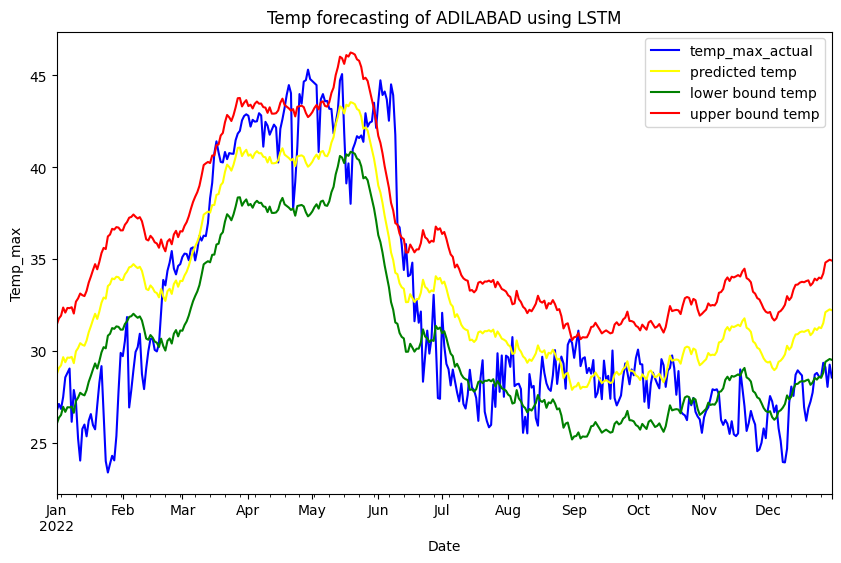

In [48]:
ax = expected.plot(
    figsize=(10, 6),
    color="blue",
    title="Temp forecasting of ADILABAD using LSTM",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

predictions.plot(ax=ax, color="yellow")     
prediction_low.plot(ax=ax, color="green")
prediction_upper.plot(ax=ax, color="red")
plt.show()

In [68]:
model = keras.models.load_model("adilabad_heat_nasa.h5")

,temp_max,rainfall
Date,,
2022-01-01,0.5348,0.000000
2022-01-02,0.5424,0.000000
2022-01-03,0.5370,0.000000
2022-01-04,0.5500,0.000000
2022-01-05,0.5714,0.000000
...,...,...
2022-12-27,0.5872,0.012133
2022-12-28,0.5824,0.002667
2022-12-29,0.5610,0.000000


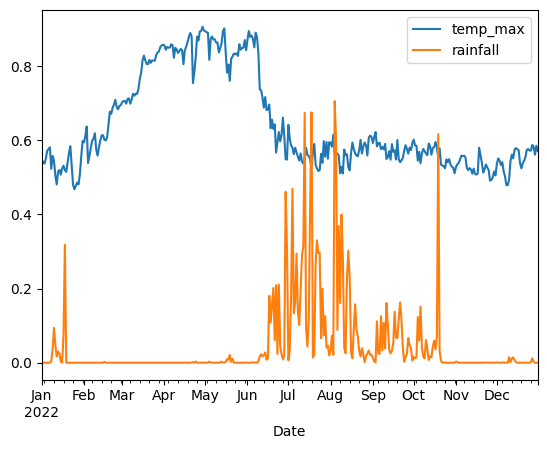

In [66]:
test_x1=df[11323:]
(test_x1).plot()
display(test_x1)
test_x1=test_x1.to_numpy()
test_x1=test_x1.reshape(1,365,2)


In [69]:
pred1= model.predict(test_x1)

1/1 [==============================] - 0s 232ms/step


In [86]:
pred1 = pred1.reshape(365)
pred2 = pd.DataFrame(data=pred1,index=df[11323:].index, columns=['temp_max'])
pred2["temp_max"] = pred2["temp_max"]*50 
pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6212\4227845883.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')


In [87]:
pred4=pred2.copy()
pred4=pred4.set_index('date')
pred4.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\adilabad_prediction_temp2.csv")

In [71]:
norm= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Normals\\temp_normals.csv")

In [83]:
pred2= pred2.loc[(pred2['temp_max']>=40)]
pred2= pred2.sort_values(by=['date'])
pred2['month']=pred2['date'].dt.month
pred2['normal']=pred2['month'].astype(float)

In [73]:
for i in range(len(pred2['temp_max'])):
    pred2['normal'][i] = float(norm['Adilabad'][int(pred2["month"][i])-1]) 
pred2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6212\3114785946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['normal'][i] = float(norm['Adilabad'][int(pred2["month"][i])-1])


,temp_max,date,month,normal
Date,,,,
2022-05-06,40.076084,2023-05-06,5,41.3
2022-05-08,40.002995,2023-05-08,5,41.3
2022-05-09,40.107750,2023-05-09,5,41.3
2022-05-10,40.439190,2023-05-10,5,41.3
2022-05-11,40.553600,2023-05-11,5,41.3
2022-05-12,40.650425,2023-05-12,5,41.3
2022-05-13,40.954353,2023-05-13,5,41.3
2022-05-14,41.148720,2023-05-14,5,41.3
2022-05-15,40.945824,2023-05-15,5,41.3


In [74]:
pred2["diff"]= pred2['temp_max']-pred2['normal']
pred3=pred2.loc[((pred2['normal']<=40) & (pred2['diff']>=5)) | ((pred2['normal']>=40) & (pred2['diff']>=4)) | (pred2['temp_max']>=45)]
pred3["heat"]=(pred3["temp_max"]).astype(str)
pred3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6212\3236756996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3["heat"]=(pred3["temp_max"]).astype(str)


,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-06-16,41.263004,2023-06-16,6,36.2,5.063004,41.263004
2022-06-17,41.245365,2023-06-17,6,36.2,5.045365,41.245365
2022-06-18,41.373791,2023-06-18,6,36.2,5.173791,41.37379
2022-06-19,41.566849,2023-06-19,6,36.2,5.366849,41.56685
2022-06-20,41.640072,2023-06-20,6,36.2,5.440072,41.64007
2022-06-21,41.732559,2023-06-21,6,36.2,5.532559,41.73256
2022-06-22,41.856915,2023-06-22,6,36.2,5.656915,41.856915
2022-06-23,41.477139,2023-06-23,6,36.2,5.277139,41.47714


In [75]:
for i in range(len(pred3['temp_max'])):
    if (((pred3['normal'][i]<=40) & (pred2['diff'][i]<7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]<6))):
        pred3['heat'][i]='Warning! Heatwave expected'
    elif (((pred3['normal'][i]<=40) & (pred2['diff'][i]>=7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]>=6)) | (pred2['temp_max']>=45)):
        pred3['heat'][i]='Warning! Severe Heatwave expected'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6212\1608767477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3['heat'][i]='Warning! Heatwave expected'


In [76]:
pred3

,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-06-16,41.263004,2023-06-16,6,36.2,5.063004,Warning! Heatwave expected
2022-06-17,41.245365,2023-06-17,6,36.2,5.045365,Warning! Heatwave expected
2022-06-18,41.373791,2023-06-18,6,36.2,5.173791,Warning! Heatwave expected
2022-06-19,41.566849,2023-06-19,6,36.2,5.366849,Warning! Heatwave expected
2022-06-20,41.640072,2023-06-20,6,36.2,5.440072,Warning! Heatwave expected
2022-06-21,41.732559,2023-06-21,6,36.2,5.532559,Warning! Heatwave expected
2022-06-22,41.856915,2023-06-22,6,36.2,5.656915,Warning! Heatwave expected
2022-06-23,41.477139,2023-06-23,6,36.2,5.277139,Warning! Heatwave expected


In [77]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3 # Final dataframe containing prediction of the occurence of heatwave for the year 2023 in Adilabad

,temp_max,heat
date,,
2023-06-16,41.263004,Warning! Heatwave expected
2023-06-17,41.245365,Warning! Heatwave expected
2023-06-18,41.373791,Warning! Heatwave expected
2023-06-19,41.566849,Warning! Heatwave expected
2023-06-20,41.640072,Warning! Heatwave expected
2023-06-21,41.732559,Warning! Heatwave expected
2023-06-22,41.856915,Warning! Heatwave expected
2023-06-23,41.477139,Warning! Heatwave expected


In [80]:
pred3.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\adilabad_heatwave_prediction.csv") # saving results to csv file